In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.simplefilter("ignore") # 경고 무시 코드

In [4]:
# 타이타닉 데이터셋 로드

titanic_df = sns.load_dataset('titanic')

### 데이터 탐색

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- survived : 생존여부 (0:사망, 1:생존)
- sibsp : Sibling, Spouse(탑승한 형제자매/배우자 수)
- parch : parent, Child (탑승한 부모/자녀 수)
- Pclass : 1st=Upper, 2nd=Middle, 3rd=Lower (1에 가까울수록 좋은 자리)
- Embarked : C(Cherbourg), Q(Queenstown), S(Southampton)
- who : man, woman, child
- fare : 요금
- deck : cabin 객실번호

In [6]:
# 행, 열

titanic_df.shape

(891, 15)

In [7]:
# 기술통계요약정보
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# 누락값 제외하고 기술통계요약 정보 조회

titanic_df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [10]:
# 클래스별 탑승자는 몇명인가?
titanic_df.groupby('class').count()
titanic_df.groupby('class')['survived'].count() # 시리즈 구조
class_df = titanic_df.groupby('class')[['survived']].count() # 데이터프레임 구조
class_df

,survived
class,
First,216
Second,184
Third,491


In [11]:
# 수평막대
class_df = class_df.reset_index()
class_df


,class,survived
0,First,216
1,Second,184
2,Third,491


<BarContainer object of 3 artists>

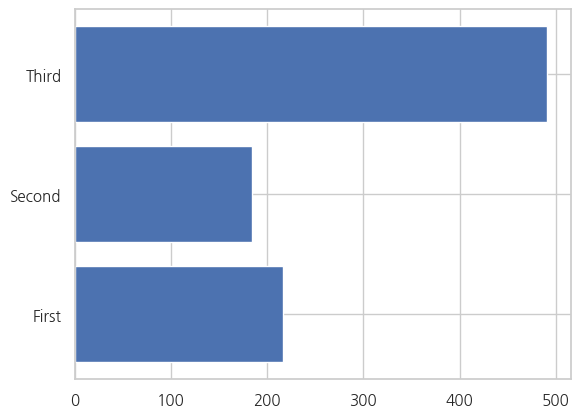

In [12]:
plt.barh(y="class", width="survived", data=class_df)

In [13]:
# 승객들이 클래스별로 지불한 요금의 중앙값은 얼마인가?
print("중앙값 : ", titanic_df.groupby('class')['fare'].median(numeric_only=True))
print("평균 : ",titanic_df.groupby('class')['fare'].mean(numeric_only=True))

중앙값 :  class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64
평균 :  class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


In [14]:
# 생존자 정보 조회
titanic_df[titanic_df['alive'] == 'yes']
titanic_df.query("alive == 'yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [15]:
# 생존자 중에서 클래스별 정보 조회
titanic_df.query("alive == 'yes'").groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [16]:
# 나이가 30세 초과인 승객에 대해 클래스별 중앙값
titanic_df.query("age > 30").groupby('class').median(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1.0,1.0,45.0,0.0,0.0,56.9292,1.0,0.0
Second,0.0,2.0,39.0,0.0,0.0,14.0000,1.0,1.0
Third,0.0,3.0,38.0,0.0,0.0,8.0500,1.0,1.0


In [17]:
# 요금지불비용이 20 보다 작은 승객에 대해 클래스별 중앙값
titanic_df.query("fare < 20").groupby("class").median(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.0,1.0,38.5,0.0,0.0,0.0000,1.0,1.0
Second,0.0,2.0,30.0,0.0,0.0,13.0000,1.0,1.0
Third,0.0,3.0,25.0,0.0,0.0,7.8958,1.0,1.0


In [18]:
class_df = titanic_df['class'].value_counts()
sex_df = titanic_df['sex'].value_counts()
alive_df = titanic_df['alive'].value_counts()
alone_df = titanic_df['alone'].value_counts()

Text(0.5, 1.0, ' alone 탑승자')

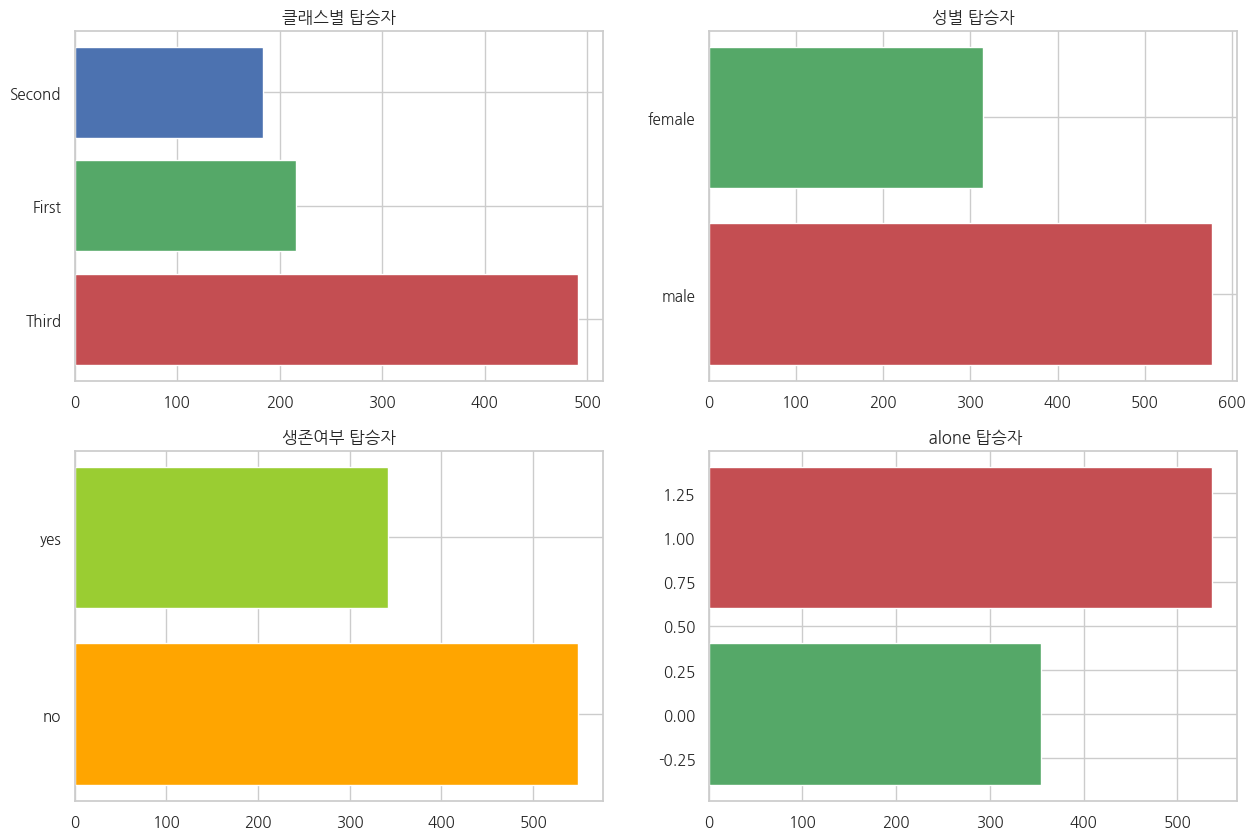

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].barh(class_df.index, width=class_df.values, color=['r', 'g', 'b'])
axes[0,0].set_title("클래스별 탑승자")

axes[0,1].barh(sex_df.index, width=sex_df.values, color=['r', 'g'])
axes[0,1].set_title("성별 탑승자")

axes[1,0].barh(alive_df.index, width=alive_df.values, color=['orange', 'yellowgreen'])
axes[1,0].set_title("생존여부 탑승자")

axes[1,1].barh(alone_df.index, width=alone_df.values, color=['r', 'g'])
axes[1,1].set_title(" alone 탑승자")

Text(0.5, 1.0, ' alone 탑승자')

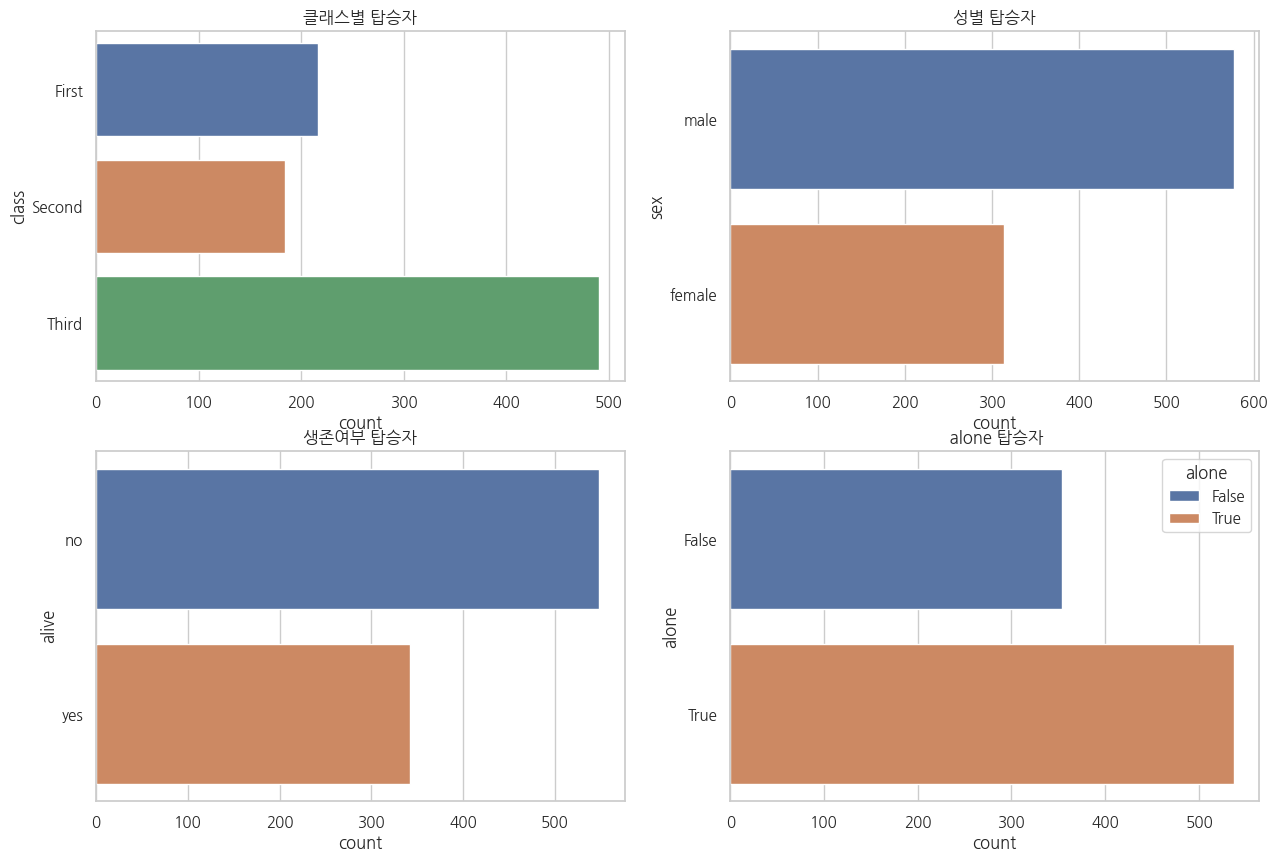

In [20]:
# seaborn 에서는 원본 df 를 가지고 바로 그릴수가 있음

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=titanic_df, y='class', hue='class', ax=axes[0,0])
axes[0,0].set_title("클래스별 탑승자")

sns.countplot(data=titanic_df, y='sex', hue='sex', ax=axes[0,1])
axes[0,1].set_title("성별 탑승자")

sns.countplot(data=titanic_df, y='alive', hue='alive', ax=axes[1,0])
axes[1,0].set_title("생존여부 탑승자")

sns.countplot(data=titanic_df, y='alone', hue='alone', ax=axes[1,1])
axes[1,1].set_title(" alone 탑승자")

- class, sex 별 나이의 중앙값

In [21]:
titanic_df.groupby(['class', 'sex'])['age'].median()

class   sex   
First   female    35.0
        male      40.0
Second  female    28.0
        male      30.0
Third   female    21.5
        male      25.0
Name: age, dtype: float64

In [22]:
# index => column : unstack()
# column => index : stack()

titanic_df.groupby(['class', 'sex'])['age'].median().unstack()

sex,female,male
class,,
First,35.0,40.0
Second,28.0,30.0
Third,21.5,25.0


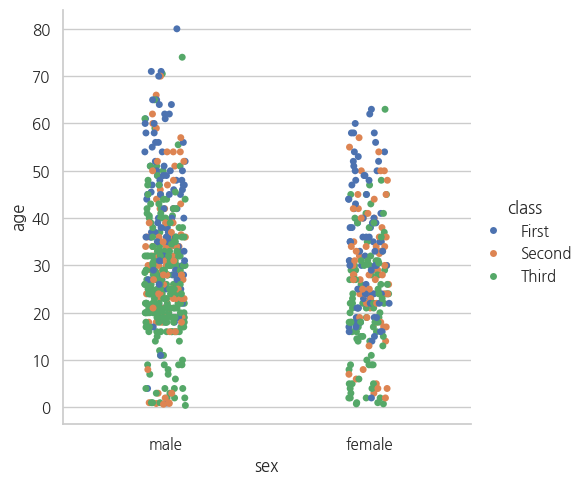

In [23]:
# 성별, 나이대 분포도 확인

# sns.scatterplot()
sns.catplot(data=titanic_df, x='sex', y='age', hue='class')

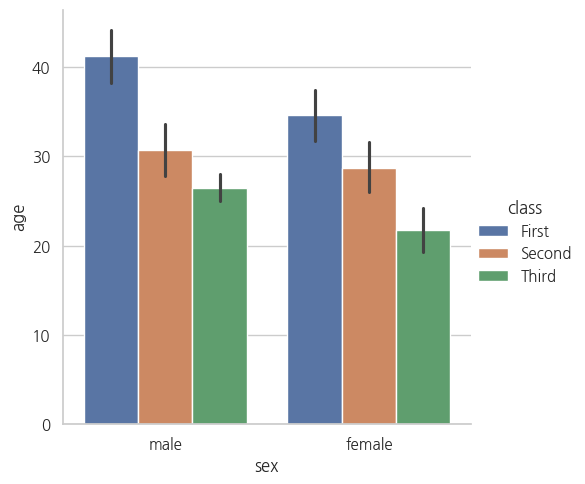

In [24]:
sns.catplot(data=titanic_df, x='sex', y='age', hue='class', kind='bar')